In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dataset**

In [4]:
# read the dataset using pandas
data = pd.read_csv('/content/drive/My Drive/StudyAsignment/Salinan student_scores.csv')

In [5]:
#this is display the top 5 rows of data
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Exploratory Data Analysis**

In [6]:
#provide some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.isna().sum() #missing value

Hours     0
Scores    0
dtype: int64

In [10]:
data.value_counts() #sebaran nilai

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
Name: count, dtype: int64

In [11]:
data.describe() #data berdasarkan statistik

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

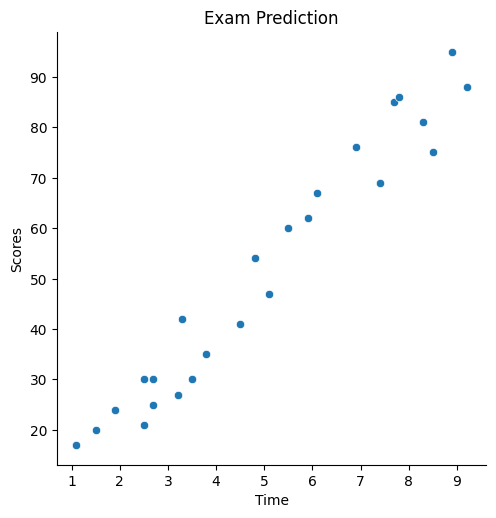

In [14]:
#Sacatter Plot
plt.figure(figsize=(12, 6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=5,kind='scatter')
plt.xlabel('Time')
plt.ylabel('Scores')
plt.title('Exam Prediction')
plt.show()

# **Investigate Feature Engineering**



In [15]:
df = data.copy()

In [17]:
#check duplicated data
print("Data Sebelum Pengecekan Duplikat: ")
print(df.shape)

Data Sebelum Pengecekan Duplikat: 
(25, 2)


In [18]:
duplicate_rows_before =df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [19]:
df=df.drop_duplicates()

In [20]:
print("Data Setelah Pengecekan Duplikat: ")
print(df.shape)

Data Setelah Pengecekan Duplikat: 
(25, 2)


In [22]:
#check mising value
data.isna().sum()

Hours     0
Scores    0
dtype: int64

# **There is no missing value**

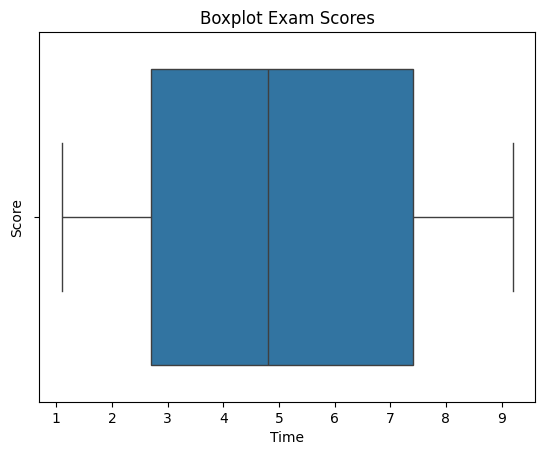

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#outlier analysis
sns.boxplot(x="Hours",data=df)

#label sumbu boxplot
plt.xlabel("Time")
plt.ylabel("Score")
plt.title("Boxplot Exam Scores")

#menampilkan boxplot
plt.show()

# There's no outlier value on Boxplot

it's means there are no problem in investigate Feature Enguneering


**Splitting The Data**

In [26]:
#Time of Exam Scores
X = data['Hours']
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [27]:
#Score of Exam
y= data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [29]:
#import machine learning from scikit learn
from sklearn.model_selection import train_test_split

In [30]:
#Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

# **Linear Reggision**

In [32]:
#library to call machine learning
!pip install scikit-learn

In [35]:
#importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [33]:
#create new axis for x colomn in scores
X_train = np.array(X_train)[:,np.newaxis]
X_test = np.array(X_test)[:,np.newaxis]

In [36]:
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [37]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [38]:
y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [39]:
#Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [40]:
#Predicting the scores for the test values
y_pred = lr_model.predict(X_test)

In [41]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [42]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

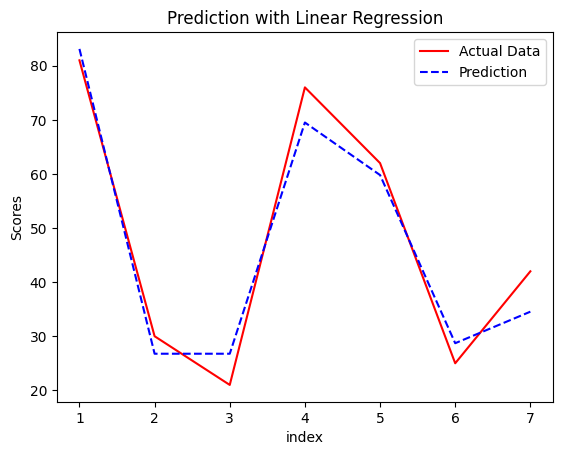

In [57]:
#plotting the actual and predicted values
c= [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle = '-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle = 'dashed',label='Prediction')
plt.xlabel('index')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [58]:
#Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
#calculate R square vale
rsq = r2_score(y_test,y_pred)

In [60]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [61]:
#Intercept and coeff of the line
print('Intercept of the Linear Regressionmodel:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regressionmodel: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


Linear Regression

# y = 9.71409219 x + 2.4803670915057623

 with x is the value of hours study

# **Using Decision Tree Regressor**

In [62]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [65]:
#Predicting the score for the values
y_pred_dt = dt_model.predict(X_test)

In [67]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [68]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [69]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

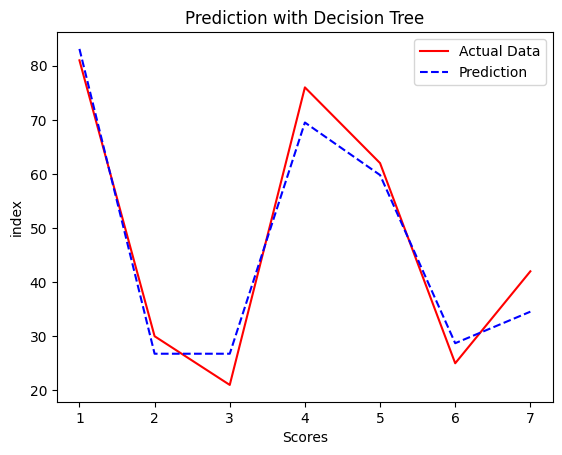

In [71]:
#Plotting the actual and predicted values
c= [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle = '-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle = 'dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [73]:
#calculate r square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [74]:
print('r square Decision Tree Results: ',rsq_dt)

r square Decision Tree Results:  0.8803859268443893


# **Using Random Forest**

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
#Predicting the score for the values
y_pred = model_rf.predict(X_test)

In [81]:
y_pred

array([79.85, 27.71, 27.71, 74.87, 63.75, 28.84, 29.03])

In [82]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

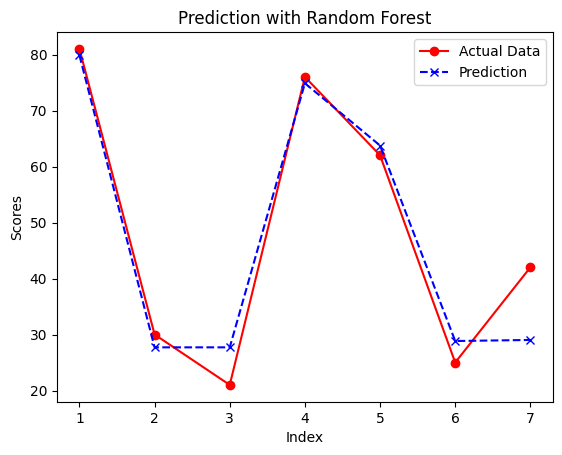

In [87]:
# Plotting the actual and predicted values
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color='r', linestyle='-', marker='o', label='Actual Data')
plt.plot(c, y_pred, color='b', linestyle='dashed', marker='x', label='Prediction')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [85]:
#evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [88]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 34.12808571428571
R^2 Score: 0.9352031850588964
